# Hotel Modeling

The business problem is to forecast the demand at two hotels. In `hotel_cleaning.ipynb`, the data has been split out into train and test, with test containing the last 30 days in the dataset, and train containing all but the last 30 days. We have the number of people who have stayed at each hotel by day going back over two full years.

In reality, this does not match the exact business problem for a hotel, since bookings are usually made in advance, but it is a good use case for forecasting small datasets, something that is very difficult to do well.

## Exploration

In [5]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [8]:
# Set plotting defaults
plt.style.use("ggplot")
plt.rcParams["figure.dpi"] = 140

In [6]:


df = pd.read_csv("../data/train.csv", parse_dates=[0], index_col=[0])
df

,Resort Hotel,City Hotel
2015-07-01,36,NaN
2015-07-02,64,NaN
2015-07-03,81,13.0
2015-07-04,108,22.0
2015-07-05,122,12.0
...,...,...
2017-08-10,178,222.0
2017-08-11,183,222.0
2017-08-12,184,225.0
2017-08-13,177,208.0


<AxesSubplot:>

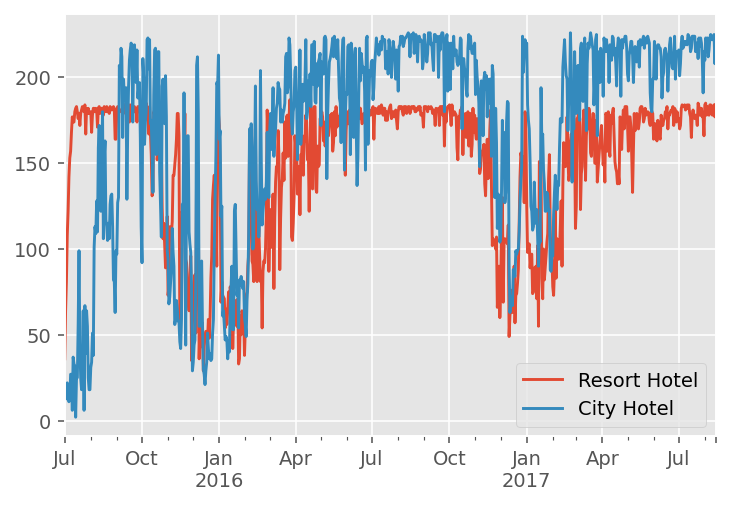

In [9]:
df.plot()

<AxesSubplot:>

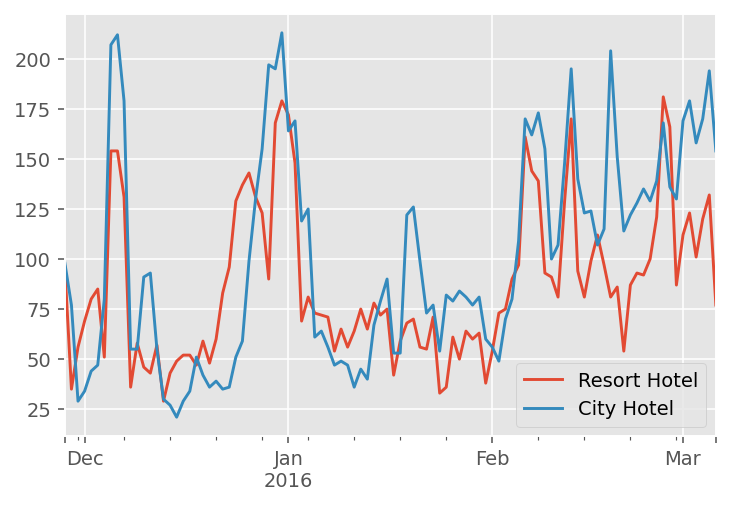

In [11]:
df.iloc[150:250].plot()

### Observations:

1. Clear seasonality in both graphs that mostly match each other
2. The resort hotel stays close to maximum capacity throughout the summer
3. Both have spikes during holidays
4. City hotel has low volume in July and August 2015--I believe this is an artifact of how the dataset was constructed, especially given how the data looks at the same time in 2016.

## Modeling

### Approaches

This dataset poses several challenges:

* There is clear seasonality, but only one prior seasonal period for the month we're trying to predict, if we remove the city data from July and August.
* Both datasets have a hard upper bound, which most methods do not take into account by default. The positive to this is we will not have to extrapolate upwards

Other relevant observations for modeling:

* The similarity between the datasets and small amount of data means a "global" model that can learn across series would be preferrable
* 2016 data indicates the final 30 days of our dataset should be somewhat similar to the test set. This could be a good validation set, but...
* The small amount of data means it will be very easy to overfit. Our method should have as much simplicity to it as possible.

Options:

* Boosted Trees
    * Advantages:
        * Global--learns for both datasets
        * Flexible: can learn weekday, day of year, time of year effects easily
        * Is not bothered by one series having more data available than another
    * Disadvantages:
        * Amount of data: trees tend to struggle with less data, and if we need features on performance a year ago, then the dataset will only be slightly longer than a year
        * Finicky: boosted trees on time series data tend to need a lot tweaking
* Arima or Exponential Smoothing
    * Advantages:
        * There are "hacks" to make either global
    * Disadvantages:
        * I don't think there's enough periods to learn seasonality for both